# Example of rainflow counting

In [1]:
import sys
sys.path.append("D:\\alexa\\Documents\\metal-fatigue")

In [2]:
import numpy as np
from metal_fatigue import rainfl
import matplotlib.pyplot as plt
%matplotlib notebook 

## Load data
Lets generate some load data (like in ASTM-Standard) and plot it. The load might be measured in MPa.

<IPython.core.display.Javascript object>


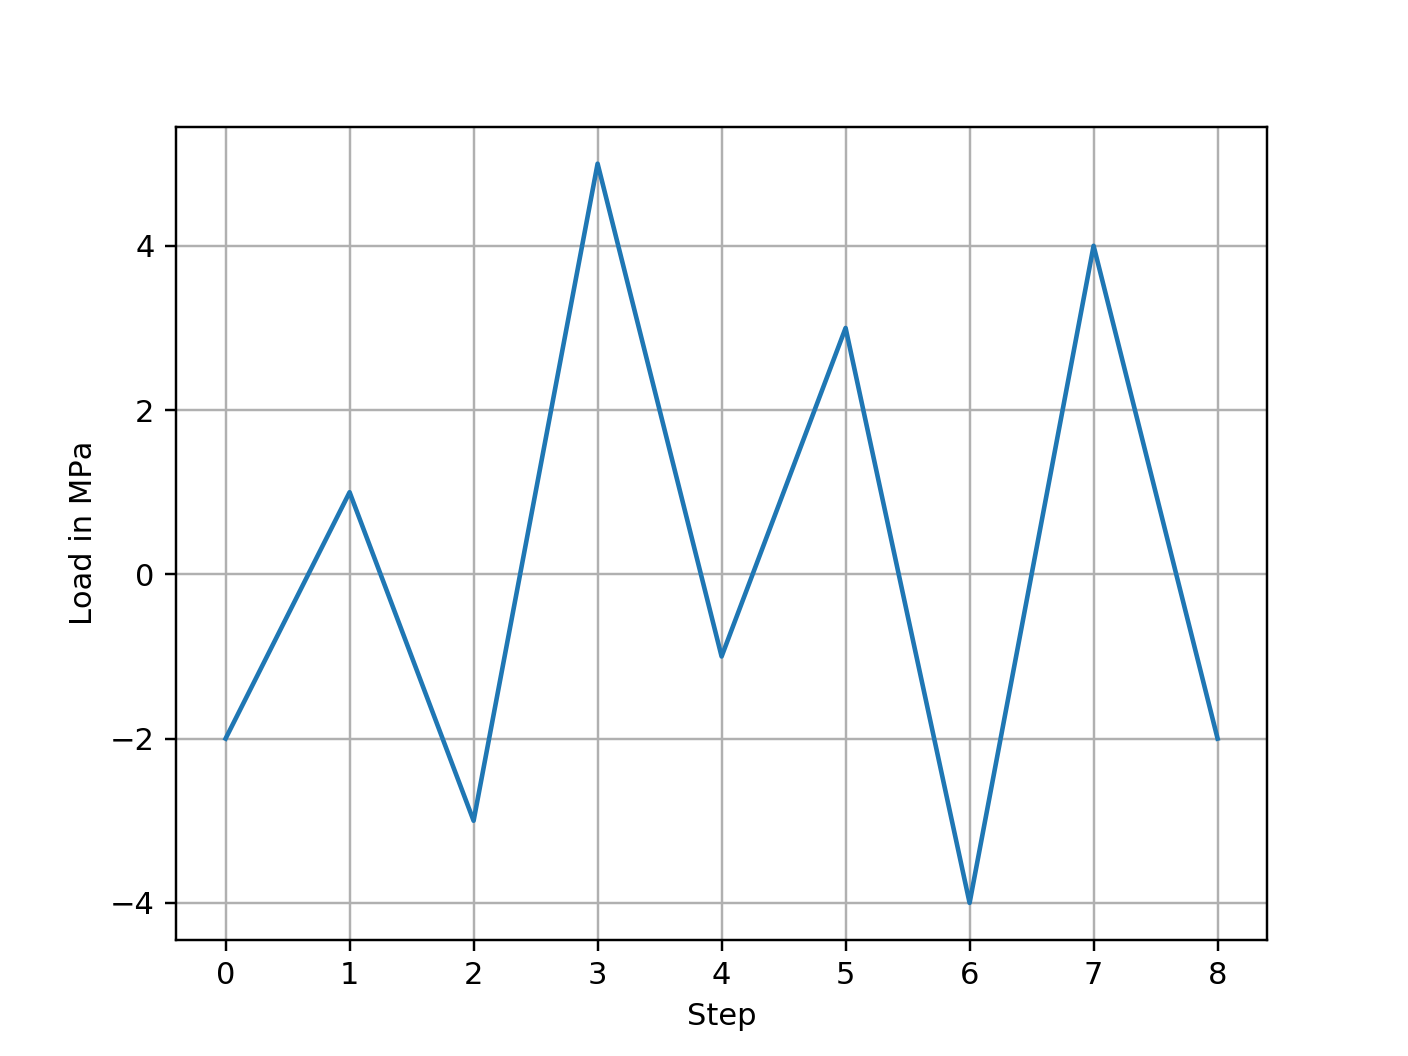

In [3]:
series = np.array([-2,1,-3,5,-1,3,-4,4,-2])
fig = plt.figure()
ax = fig.add_subplot((111))
ax.plot(series)
ax.grid()
ax.set_ylabel("Load in MPa")
ax.set_xlabel("Step")

## Rainflow counting
The *rainfl* module provides a rainflow counting algorithm. The function *rainflow_count* expects a series of turning points. It also expects a minimum and a maximum value which represents the bin edges of the rainflow from-to matrix object which is returned from the function. 

The result can be plotted by the method *plot2d*. The method *counts* gives back the underlying numpy array.

<IPython.core.display.Javascript object>


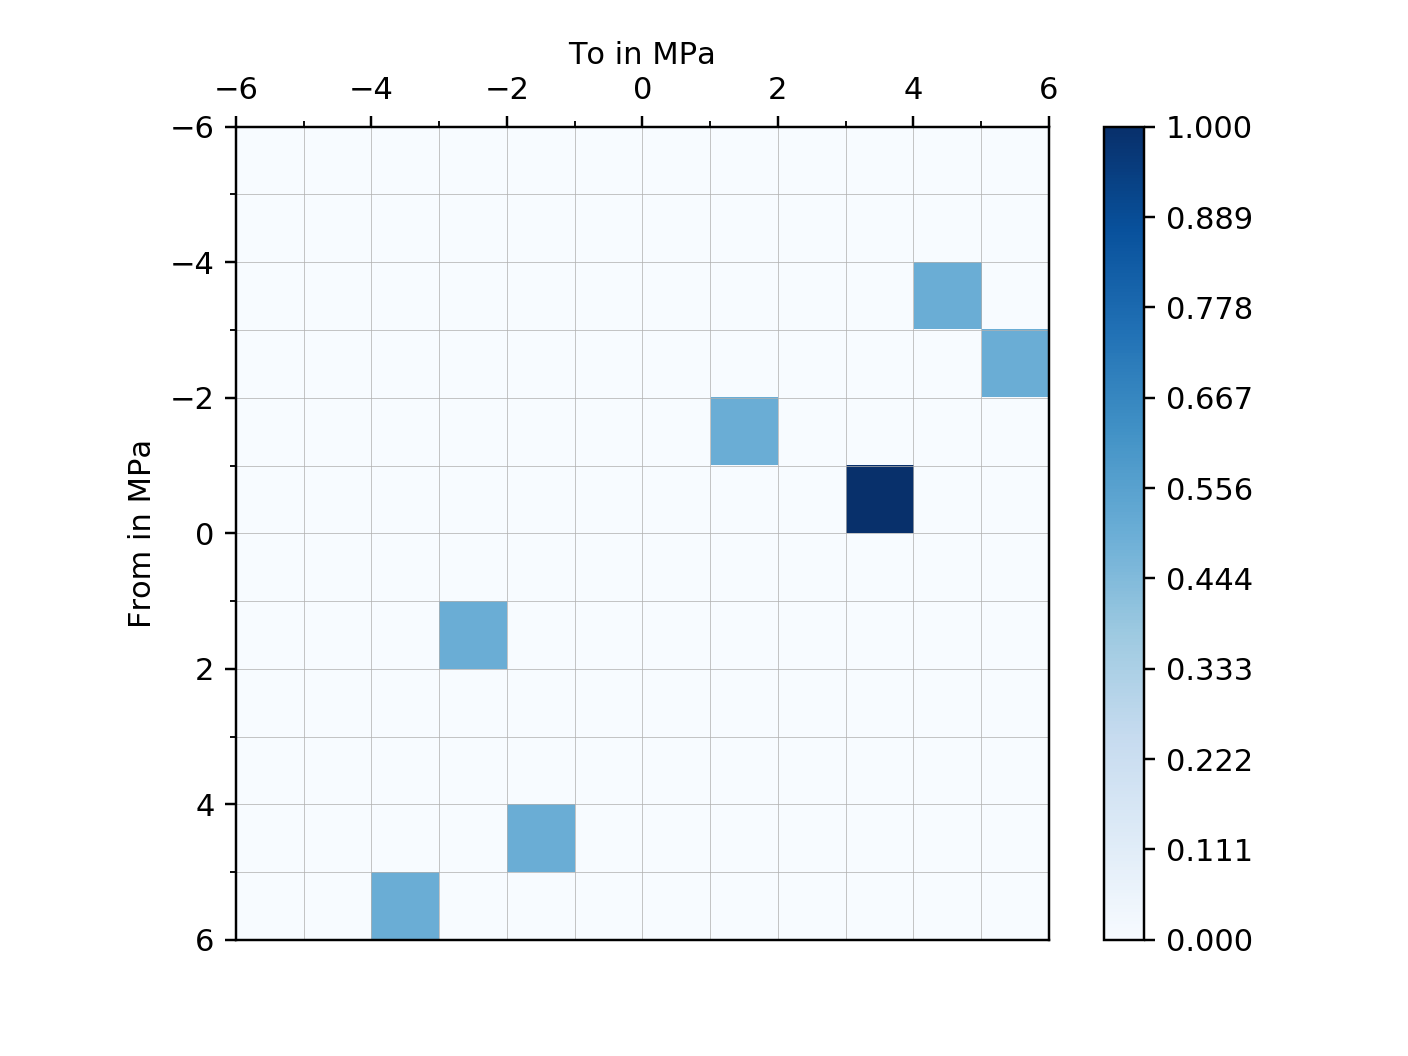

In [4]:
rfm = rainfl.rainflow_count(series,-6,6,12)
fig,ax = rfm.plot2d()
ax.set_xlabel(ax.get_xlabel()+" in MPa")
ax.set_ylabel(ax.get_ylabel()+" in MPa")